<a href="https://colab.research.google.com/github/MargauxHofmann/2022_ML_EES/blob/main/ML_Project/ML_Project_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project - World Glacier Monitoring

Import librairy

In [2]:
import csv
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the file into Google Colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database.csv


In [4]:
df = pd.read_csv("database.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9.0,...,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9.0,...,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9.0,...,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9.0,...,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132885,ZR3B410A1002,ZAIRE,AFRICA,B410,A1,2,KRAEPELIN,0.438,29.899,6.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,25000.0,NaN
132886,ZR3B410A1003,ZAIRE,AFRICA,B410,A1,3,NORTH-KRAEPELIN,0.440,29.898,6.0,...,0.1,NaN,NaN,NaN,NaN,NW,NW,1968.0,25000.0,NaN
132887,ZR3B410A2002,ZAIRE,AFRICA,B410,A2,2,ALBERT,0.389,29.871,6.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,25000.0,NaN
132888,ZR3B410A3001,ZAIRE,AFRICA,B410,A3,1,ALEXANDRA,0.389,29.868,6.0,...,0.8,NaN,NaN,NaN,NaN,W,SW,1968.0,25000.0,NaN


Go through the data

In [ ]:
df.describe()

,Latitude,Longitude,Primary Class,Glacier Source,Basin Count,Glacier Form,Glacier Activity,Activity Start,Activity End,Minimum Elevation,...,Mean Width,Mean Length,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Topographic Map Year,Topographic Map Scale,Photograph Year
count,132890.000000,132890.000000,131406.000000,132746.000000,15558.000000,131813.000000,132775.000000,4202.000000,143.000000,117162.000000,...,69966.000000,55258.000000,102593.000000,84621.000000,17051.000000,70071.000000,78685.000000,83697.000000,74586.000000,82464.000000
mean,36.322101,31.902296,5.716231,0.864712,1.031752,3.738918,0.620448,1967.112327,1986.930070,3502.362063,...,0.563436,1.392470,1.417326,1.328634,1.621133,28.415085,2.262960,1970.529565,96838.461508,1974.795899
std,27.821062,83.860643,1.768668,0.494326,0.327473,2.255064,1.072336,11.348193,6.999648,1735.317842,...,0.643816,2.087975,2.560785,1.984061,3.286073,46.480501,0.999009,10.276403,69675.200534,14.107653
min,-71.657200,-179.918000,0.000000,0.000000,1.000000,0.000000,0.000000,1901.000000,1958.000000,0.000000,...,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,1.000000,1901.000000,750.000000,1900.000000
25%,30.616000,-50.375000,6.000000,1.000000,1.000000,3.000000,0.000000,1963.000000,1986.000000,1800.000000,...,0.300000,0.500000,0.500000,0.500000,0.200000,12.000000,1.000000,1966.000000,50000.000000,1968.000000
50%,38.580000,75.484500,6.000000,1.000000,1.000000,4.000000,0.000000,1967.000000,1986.000000,3840.000000,...,0.400000,0.800000,0.800000,0.800000,0.600000,20.000000,2.000000,1972.000000,90000.000000,1971.000000
75%,49.223000,85.265750,7.000000,1.000000,1.000000,5.000000,1.000000,1975.000000,1988.000000,5020.000000,...,0.700000,1.510000,1.500000,1.500000,2.000000,36.000000,3.000000,1978.000000,100000.000000,1980.000000
max,89.300000,179.680000,9.000000,3.000000,7.000000,9.000000,8.000000,1996.000000,2002.000000,8047.000000,...,29.800000,76.640000,145.000000,125.000000,64.500000,7060.000000,5.000000,1998.000000,1000000.000000,2003.000000


In [ ]:
df.shape

(132890, 39)

In [ ]:
df.isna().sum()

Glacier ID                          0
Political Unit                      0
Continent                           0
Basin Code                          0
Location Code                       0
Glacier Code                        0
Glacier Name                    86139
Latitude                            0
Longitude                           0
Primary Class                    1484
Glacier Source                    144
Basin Count                    117332
Glacier Form                     1077
Glacier Activity                  115
Activity Start                 128688
Activity End                   132747
Minimum Elevation               15728
Minimum Elevation Exposed       43193
Mean Elevation                  51291
Mean Elevation Accumulation    117417
Mean Elevation Ablation        121837
Maximum Elevation               17422
Snow Line Elevation            104042
Snow Line Accuracy             109566
Glacier Area                     4516
Area Accuracy                   48450
Area Exposed

Preparing dataset for the models. Selectionning all the columns of interest together, to select only the line without NaN

In [5]:
df_select = df[["Snow Line Elevation", "Latitude", "Longitude", "Glacier Area", "Accumulation Orientation", "Ablation Orientation","Ablation Orientation", "Mean Length", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [6]:
df_select_noNan = df_select.dropna()

In [7]:
df_select_noNan.shape

(5700, 13)

Preparing training and tests set

In [8]:
X = df_select_noNan[[ "Latitude", "Longitude", "Glacier Area", "Mean Length", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [9]:
y = df_select_noNan[['Snow Line Elevation']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [12]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [13]:
explained_variance = explained_variance_score(y_test, # We'll need our ground truth
                   y_pred_df) # and our predictions
print(explained_variance)               

0.9803169303027423


Features importance

In [16]:
importance = Lr.coef_
print(importance)

[[-1.01278652  0.39320054 -0.86491754 10.78532302  0.42741698  0.43105156
   0.10080036 -0.96070325 -8.09571723]]


Trying with only the mean elevation as predictor 

In [18]:
X = df_select_noNan[["Mean Elevation"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [20]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
explained_variance = explained_variance_score(y_test, # We'll need our ground truth
                   y_pred_df) # and our predictions
print(explained_variance)  

0.9788400077439836


# Predicting Activity

Prepare the dataset

In [21]:
df_select = df[["Glacier Activity", "Snow Line Elevation","Latitude", "Longitude", "Glacier Area", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [ ]:
df_select

Replace the 0 value (which means uncertained activity) by na values

In [22]:
df_select['Glacier Activity'] = df['Glacier Activity'].replace(0, np.nan)

<ipython-input-22-b5e3fd7f1cd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Glacier Activity'] = df['Glacier Activity'].replace(0, np.nan)


Check that it worked

In [23]:
df_select

,Glacier Activity,Snow Line Elevation,Latitude,Longitude,Glacier Area,Mean Elevation,Minimum Elevation,Maximum Elevation,Primary Class,Glacier Form
0,NaN,NaN,34.672,68.874,1.28,4110.0,3975.0,4250.0,9.0,3.0
1,NaN,NaN,34.676,68.855,0.31,4350.0,4250.0,4450.0,9.0,3.0
2,NaN,NaN,34.689,68.854,0.60,4100.0,4000.0,4200.0,9.0,3.0
3,NaN,NaN,34.707,68.857,0.56,4175.0,4000.0,4350.0,9.0,3.0
4,NaN,NaN,34.719,68.852,1.06,4050.0,3750.0,4350.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...
132885,NaN,NaN,0.438,29.899,0.04,NaN,4630.0,4750.0,6.0,8.0
132886,NaN,NaN,0.440,29.898,0.02,NaN,4690.0,4750.0,6.0,4.0
132887,NaN,NaN,0.389,29.871,0.02,5030.0,NaN,5095.0,6.0,3.0
132888,NaN,NaN,0.389,29.868,0.25,4740.0,4510.0,5060.0,6.0,4.0


In [24]:
df_select.isna().sum()

Glacier Activity        94618
Snow Line Elevation    104042
Latitude                    0
Longitude                   0
Glacier Area             4516
Mean Elevation          51291
Minimum Elevation       15728
Maximum Elevation       17422
Primary Class            1484
Glacier Form             1077
dtype: int64

In [25]:
df_select_noNan = df_select.dropna()

In [26]:
df_select_noNan.shape

(4988, 10)

Select the predictors

In [32]:
X = df_select_noNan[["Snow Line Elevation", "Latitude", "Longitude", "Glacier Area", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [28]:
#X = df_select_noNan[[ "Glacier Area", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

Select the varible to predict

In [33]:
y = df_select_noNan[["Glacier Activity"]]

Prepare the train/test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [45]:
param_grid = {'max_leaf_nodes':range(2,120), 'min_samples_split':range(2,10)}


gsc_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3,verbose=1)

gsc_tree.fit(X_train,y_train)
print(gsc_tree.best_estimator_)
y_pred_test = gsc_tree.predict(X_test)
print(f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test)):.2%}')

Fitting 3 folds for each of 944 candidates, totalling 2832 fits
DecisionTreeClassifier(max_leaf_nodes=62, min_samples_split=9)
Accuracy over test set: 79.56%


# Random Forest Classifier --> ensemble learning

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=62, min_samples_split=9)
clf.fit(X_train, y_train)

<ipython-input-46-855b8fbf4419>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=62, min_samples_split=9, n_estimators=200)

In [47]:
y_pred= clf.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
accuracy = accuracy_score(y_true=y_test, # We'll need our ground truth
                   y_pred=y_pred) # and our predictions 
print(accuracy)

0.8076152304609219


Features importance

In [50]:
feature_imp = pd.Series(clf.feature_importances_)
feature_imp

0    0.097191
1    0.163178
2    0.318274
3    0.069399
4    0.089410
5    0.066008
6    0.148720
7    0.032097
8    0.015722
dtype: float64

In [51]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

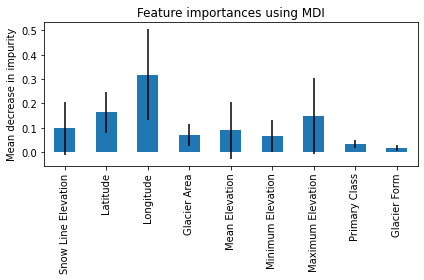

In [52]:
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()